In [1]:
import numpy as np
from typing import Optional, Tuple
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import find_peaks
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
%matplotlib widget

# Exercise 4: **Blackbody Radiation**

*Visualize and explain the behavior of the brightness of a blackbody as a function of frequency
and temperature.
Your visualizations should include:*
* *two diﬀerent units: $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$ and $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$*
* *two diﬀerent scales: linear and logarithmic*


A blackbody is an idealized physical body that absorbs all incident electromagnetic radiation, regardless of frequency or angle of incidence. A blackbody is also a perfect emitter of radiation, meaning that it emits radiation at all frequencies. Further, such a black body is in thermodynamic equilibrium with its environment. The radiation emitted by a blackbody is called blackbody radiation. The spectrum of blackbody radiation is continuous and depends only on the temperature of the blackbody. The spectrum of blackbody radiation is given by Planck's law:

$I(\nu, T) = \dfrac{2 h \nu^3}{\mathrm{c}^2} \cdot \dfrac{1}{\exp\left(\dfrac{h\nu}{k_B T}\right) - 1}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$

$I(\lambda, T) = \dfrac{2 h \mathrm{c}^2}{\lambda^5} \cdot \dfrac{1}{\exp\left(\dfrac{h\mathrm{c}}{\lambda k_B T}\right) - 1}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

where $I(\lambda, T)$ is the spectral radiance of the blackbody, $h$ is Planck's constant, $c$ is the speed of light in vacuum, $\lambda$ is the wavelength, $k_B$ is Boltzmann's constant and $T$ is the temperature of the blackbody. 

Conversion from $I(\nu, T)$ to $I(\lambda, T)$ is done as: $I(\lambda, T) = \dfrac{1}{\nu^6\mathrm{c}} \cdot I(\nu, T)$.

## 4.1 Which approximations of Planck’s law exist and what are their validity conditions? Demonstrate the validity using your visualization.

The **Wien Radiation Law** is an approximation of Planck's law for the spectral radiance of a blackbody at high frequencies:

$I(\nu, T) \approx \dfrac{2 h \nu^3}{\mathrm{c}^2} \cdot \exp\left(-\dfrac{h\nu}{k_B T}\right)$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$ or $I(\lambda, T) \approx \dfrac{2 h \mathrm{c}^2}{\lambda^5} \cdot \exp\left(-\dfrac{h\mathrm{c}}{\lambda k_B T}\right)$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

For low frequencies, the **Rayleigh-Jeans Law** is an approximation of Planck's law for the spectral radiance of a blackbody:

$I(\nu, T) = \dfrac{2 \nu^2 k_B T}{\mathrm{c}^2}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right]$  or $I(\lambda, T) = \dfrac{2 \mathrm{c}k_B T}{\lambda^4}$,     $\left[\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right]$

In [2]:
BOLTZMANN_CONSTANT = 1.380649e-23 # J/K
PLANCK_CONSTANT = 6.62607015e-34 # Js
SPEED_OF_LIGHT = 299792458 # m/s

def blackbody_nu(nu: float, temp: float) -> float:
    '''Calculates the spectral radiance of a black body in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K
    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * nu**3 / (SPEED_OF_LIGHT**2 * (np.exp(PLANCK_CONSTANT * nu / (BOLTZMANN_CONSTANT * temp)) - 1))

def blackbody_lambda(wavelength: float, temp: float) -> float:
    '''Calculates the spectral radiance of a black body in units of W/(m^3 * sr^2).

    Parameters:
    -----------
    lambda: float
        Wavelength in m
    temp: float
        Temperature in K
    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * SPEED_OF_LIGHT**2 / (wavelength**5 * (np.exp(PLANCK_CONSTANT * SPEED_OF_LIGHT / (wavelength * BOLTZMANN_CONSTANT * temp)) - 1))


def wien_nu_max(temp: float) -> float:
    '''Approximates the frequency of the maximum spectral radiance of a black body in units of Hz, based on Wien's displacement law.

    Parameters:
    -----------
    temp: float
        Temperature in K

    Returns:
    --------
    freq: float
        Frequency in Hz
    '''
    return 5.87e10 * temp


def wien_lambda_max(temp: float) -> float:
    '''Approximates the wavelength of the maximum spectral radiance of a black body in units of m, based on Wien's displacement law.

    Parameters:
    -----------
    temp: float
        Temperature in K

    Returns:
    --------
    wavelength: float
        Wavelength in m
    '''
    return 2.87e-3 / temp


def wrl(nu: float, temp: float) -> float:
    '''Calculates the Wien Radiation Law in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K

    Returns:
    --------
        float
    '''
    return 2 * PLANCK_CONSTANT * nu**3 / (SPEED_OF_LIGHT**2) * np.exp(-1 * PLANCK_CONSTANT * nu / (BOLTZMANN_CONSTANT * temp))


def rjl(nu: float, temp: float) -> float:
    '''Calculates the Rayleigh-Jeans Law in units of W/(m^2 * Hz * sr^2).

    Parameters:
    -----------
    nu: float
        Frequency in Hz
    temp: float
        Temperature in K

    Returns:
    --------
        float
    '''
    return 2 * BOLTZMANN_CONSTANT * temp * nu**2 / SPEED_OF_LIGHT**2

interactive(children=(FloatSlider(value=300.0, description='T (K)', max=100000.0, step=10.0), Output()), _dom_…

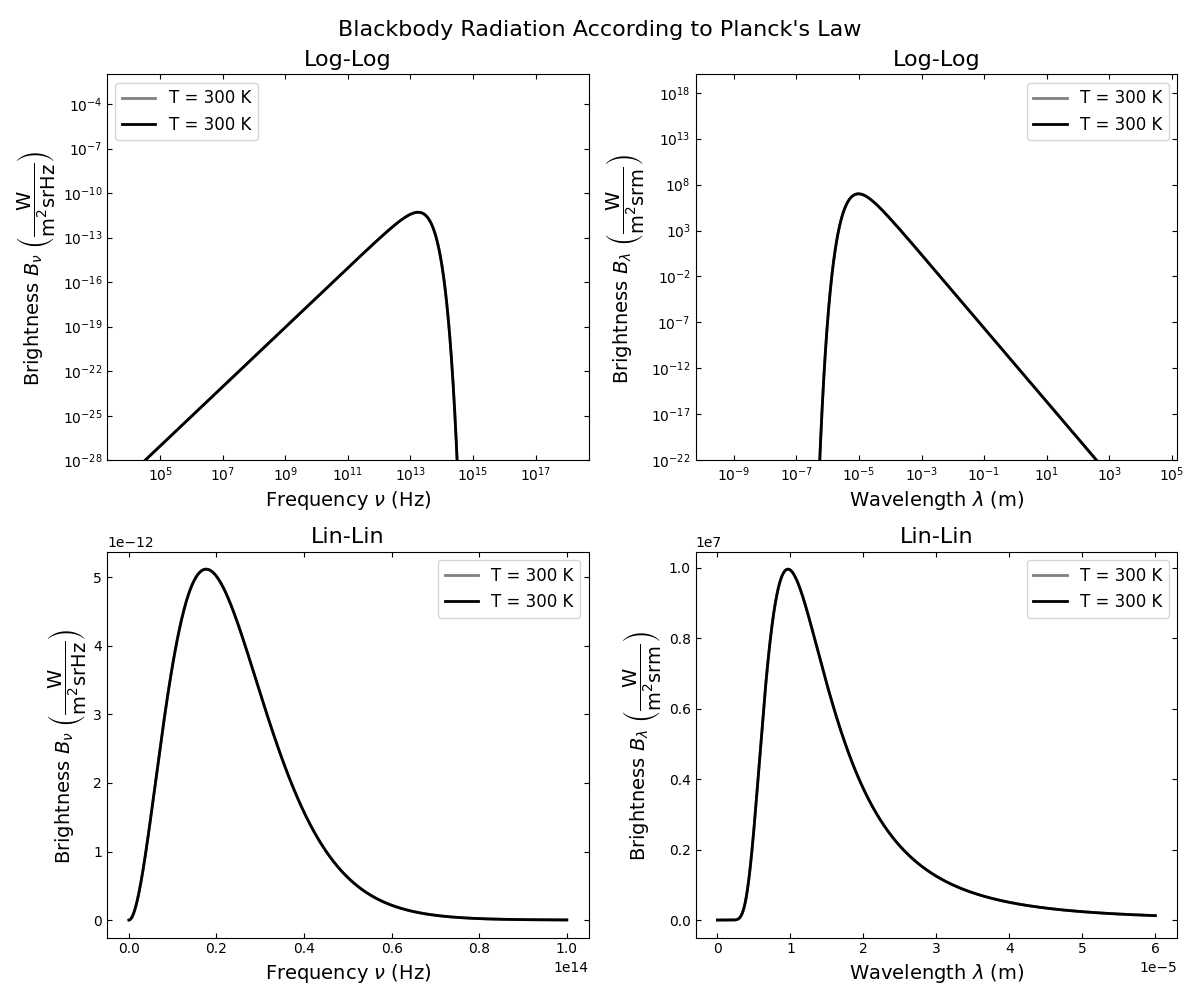

In [3]:
nu_num = int(1e5)

nus_log = np.logspace(4, 18, nu_num)
lambdas_log = SPEED_OF_LIGHT / nus_log

nus_lin = np.linspace(0, 10**14, nu_num)
lambdas_lin = np.linspace(0, 6e-5, nu_num)

initial_temp = 300
nu_max_initial = wien_nu_max(temp=initial_temp)
lambda_max_initial = wien_lambda_max(temp=initial_temp)

blackbody_nu_log = blackbody_nu(nu=nus_log, temp=initial_temp)
blackbody_lambda_log = blackbody_lambda(wavelength=lambdas_log, temp=initial_temp)
blackbody_nu_lin = blackbody_nu(nu=nus_lin, temp=initial_temp)
blackbody_lambda_lin = blackbody_lambda(wavelength=lambdas_lin, temp=initial_temp)


fig = plt.figure(figsize=(12, 10))
fig.suptitle("Blackbody Radiation According to Planck's Law", fontsize=16)

ax0 = fig.add_subplot(221)
ax0.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l00, = ax0.plot(nus_log, blackbody_nu_log, linewidth=2, color='grey', label=r'T = 300 K')#, $\nu_{max}$ = ' + f'{nu_max_initial:.2e} Hz')
# m00, = ax0.plot([nu_max_initial, nu_max_initial], [0, np.max(blackbody_nu_log)], linewidth=2, color='grey', linestyle='dashed')

l01, = ax0.plot(nus_log, blackbody_nu_log, linewidth=2, color='black', label= r'T = 300 K')#, $\nu_{max}$ = ' + f'{nu_max_initial:.2e} Hz')
# m01, = ax0.plot([nu_max_initial, nu_max_initial], [0, np.max(blackbody_nu_log)], linewidth=2, color='black', linestyle='dashed')

ax0.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax0.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax0.set_title("Log-Log", fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_ylim(1e-28, 1e-2)

ax0.legend(loc = 'upper left', fontsize=12)


ax1 = fig.add_subplot(222)
ax1.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l10, = ax1.plot(lambdas_log, blackbody_lambda_log, linewidth=2, color='grey', label= r'T = 300 K')#, $\lambda_{max}$ = ' + f'{lambda_max_initial:.2e} m')
# m10, = ax1.plot([lambda_max_initial, lambda_max_initial], [0, np.max(blackbody_lambda_log)], linewidth=2, color='grey', linestyle='dashed')

l11, = ax1.plot(lambdas_log, blackbody_lambda_log, linewidth=2, color='black', label='T = 300 K')#, $\lambda_{max}$ = ' + f'{lambda_max_initial:.2e} m')
# m11, = ax1.plot([lambda_max_initial, lambda_max_initial], [0, np.max(blackbody_lambda_log)], linewidth=2, color='black', linestyle='dashed')

ax1.set_xlabel(r'Wavelength $\lambda$ (m)', fontsize=14)
ax1.set_ylabel(r'Brightness $B_{\lambda}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right)$ ', fontsize=14)
ax1.set_title("Log-Log", fontsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-22, 1e20)

ax1.legend(loc = 'upper right', fontsize=12)

ax2 = fig.add_subplot(223)
ax2.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l20, = ax2.plot(nus_lin, blackbody_nu_lin, linewidth=2, color='grey', label= 'T = 300 K')
l21, = ax2.plot(nus_lin, blackbody_nu_lin, linewidth=2, color='black', label= 'T = 300 K')

ax2.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax2.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax2.set_title("Lin-Lin", fontsize=16)
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.yaxis.set_major_formatter(ScalarFormatter())
ax2.legend(loc = 'upper right', fontsize=12)

ax3 = fig.add_subplot(224)
ax3.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l30, = ax3.plot(lambdas_lin, blackbody_lambda_lin, linewidth=2, color='grey', label='T = 300 K')
l31, = ax3.plot(lambdas_lin, blackbody_lambda_lin, linewidth=2, color='black', label='T = 300 K')

ax3.set_xlabel(r'Wavelength $\lambda$ (m)', fontsize=14)
ax3.set_ylabel(r'Brightness $B_{\lambda}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{m}}\right)$ ', fontsize=14)
ax3.set_title("Lin-Lin", fontsize=16)
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.yaxis.set_major_formatter(ScalarFormatter())
ax3.legend(loc = 'upper right', fontsize=12)


slider_temp = FloatSlider(value=initial_temp, min=0, max=1e5, step=10, description=r'T (K)')


@interact(temperature=slider_temp)
def update_temperature(temperature):
    data0_log = blackbody_nu(nus_log, temperature)
    data1_log = blackbody_lambda(lambdas_log, temperature)

    data0_lin = blackbody_nu(nus_lin, temperature)
    data1_lin = blackbody_lambda(lambdas_lin, temperature)

    nu_max = wien_nu_max(temp=temperature)
    lambda_max = wien_lambda_max(temp=temperature)
    
    l01.set_ydata(data0_log)
    l01.set_label(f'T = {int(temperature)} K')#, ' + r'$\nu_{max}$ = ' + f'{nu_max:.2e} Hz')
    # m01.set_xdata([nu_max, nu_max])
    # m01.set_ydata([ax0.get_ylim()[0], ax0.get_ylim()[1]])
    ax0.legend(loc='upper left', fontsize=12)

    l11.set_ydata(data1_log)
    l11.set_label(f'T = {int(temperature)} K')#, ' + r'$\lambda_{max}$ = ' + f'{lambda_max:.2e} m')
    # m11.set_xdata([lambda_max, lambda_max])
    # m11.set_ydata([ax1.get_ylim()[0], ax1.get_ylim()[1]])
    ax1.legend(loc='upper right', fontsize=12)

    l21.set_ydata(data0_lin)
    l21.set_label(f'T = {int(temperature)} K')
    ax2.legend(loc='upper right', fontsize=12)

    l31.set_ydata(data1_lin)
    l31.set_label(f'T = {int(temperature)} K')
    ax3.legend(loc='upper right', fontsize=12)

    ax0.relim()
    ax0.autoscale_view()
    ax1.relim()
    ax1.autoscale_view()
    ax2.relim()
    ax2.autoscale_view()
    ax3.relim()
    ax3.autoscale_view()
    
    fig.canvas.draw_idle()

plt.tight_layout()


interactive(children=(FloatSlider(value=300.0, description='T (K)', max=800.0, step=10.0), Output()), _dom_cla…

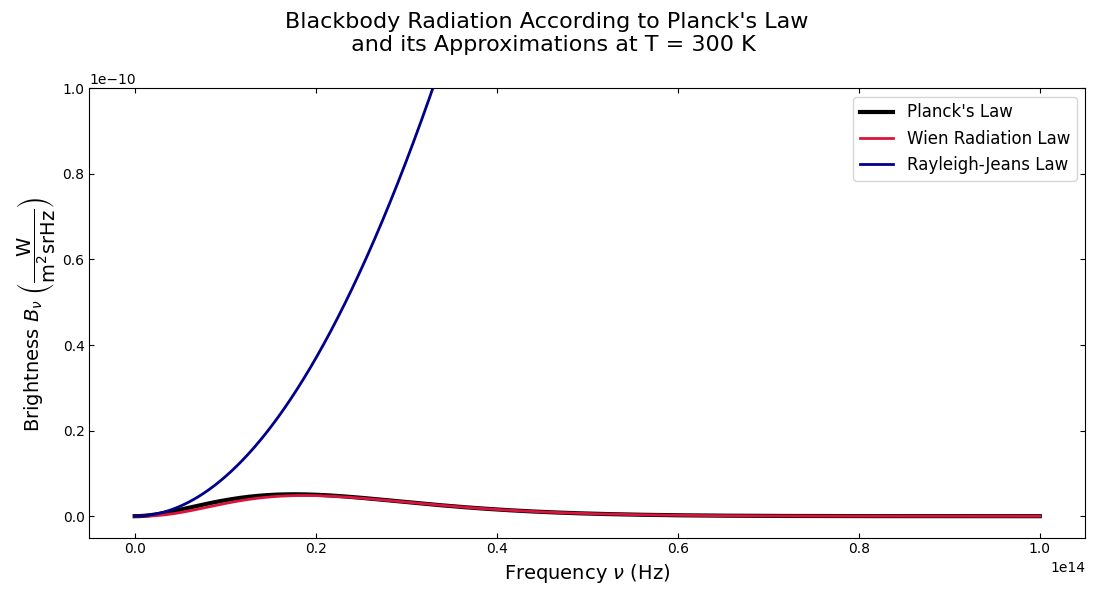

In [4]:
fig = plt.figure(figsize=(11, 6))

initial_temp = 300
nus_lin = np.linspace(0, 10**14, nu_num)

planck = blackbody_nu(nus_lin, temp=initial_temp)


wien = wrl(nus_lin, temp=initial_temp)
rayleigh= rjl(nus_lin, temp=initial_temp)

fig.suptitle(f"Blackbody Radiation According to Planck's Law \n and its Approximations at T = {initial_temp} K", fontsize=16)

ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='both', direction = 'in', top=True, bottom=True, left=True, right=True)

l0, = ax.plot(nus_lin, planck, linewidth=3, color='black', label= "Planck's Law")
ax.set_ylim(-0.05e-10, 1e-10)
l1, = ax.plot(nus_lin, wien, linewidth=2, color='crimson', label= 'Wien Radiation Law')
l2, = ax.plot(nus_lin, rayleigh, linewidth=2, color='darkblue', label= 'Rayleigh-Jeans Law')


ax.set_xlabel(r'Frequency $\nu$ (Hz)', fontsize=14)
ax.set_ylabel(r'Brightness $B_{\nu}$ $\left(\dfrac{\mathrm{W}}{\mathrm{m}^2\mathrm{sr}\mathrm{Hz}}\right)$ ', fontsize=14)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc = 'upper right', fontsize=12)

slider_temp = FloatSlider(value=initial_temp, min=0, max=8e2, step=10, description=r'T (K)')


# Update function for all subplots
@interact(temperature=slider_temp)
def update_temperature(temperature):
    # Update data in all subplots using the new temperature
    planck = blackbody_nu(nus_lin, temperature)
    wien = wrl(nus_lin, temperature)
    rayleigh= rjl(nus_lin, temperature)

    l0.set_ydata(planck)
    l1.set_ydata(wien)
    l2.set_ydata(rayleigh)

    fig.suptitle(f"Blackbody Radiation According to Planck's Law \n and its Approximations at T = {int(temperature)} K", fontsize=16)

    # ax.relim()
    # ax.autoscale_view()

    
    # Redraw the figure
    fig.canvas.draw_idle()

plt.tight_layout()
